In [1]:
import pandas as pd
import matplotlib as plt


In [2]:
df = pd.read_csv ('sample_sales_data.csv')

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## EXPLORATORY DATA ANALYSIS

In [4]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [6]:
pd.unique(df['customer_type'])

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

In [7]:
pd.unique(df['category'])

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

In [8]:
pd.unique(df['payment_type'])

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

In [9]:
import seaborn as sns

## DATA VISUALIZATION

<AxesSubplot:xlabel='payment_type', ylabel='unit_price'>

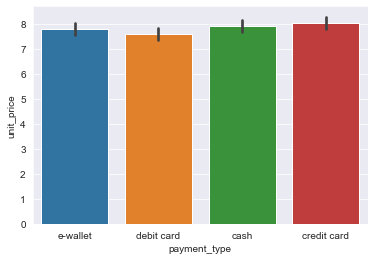

In [10]:
sns.barplot(data = df, x='payment_type', y='unit_price')

<AxesSubplot:xlabel='payment_type', ylabel='quantity'>

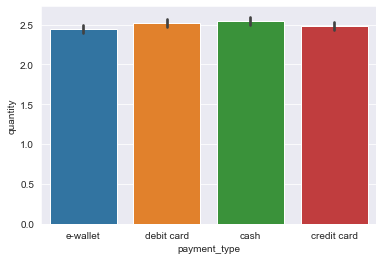

In [11]:
sns.barplot(data = df, x='payment_type', y='quantity')

<AxesSubplot:xlabel='payment_type', ylabel='total'>

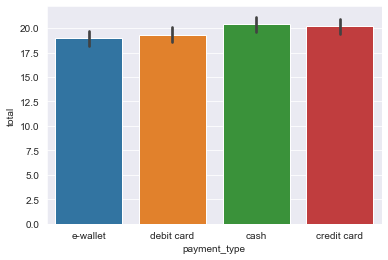

In [12]:
sns.barplot(data = df, x='payment_type', y='total')

<AxesSubplot:xlabel='customer_type', ylabel='total'>

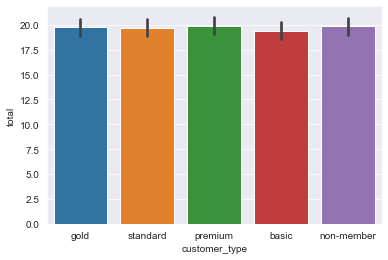

In [13]:
sns.barplot(data = df, x='customer_type', y='total')

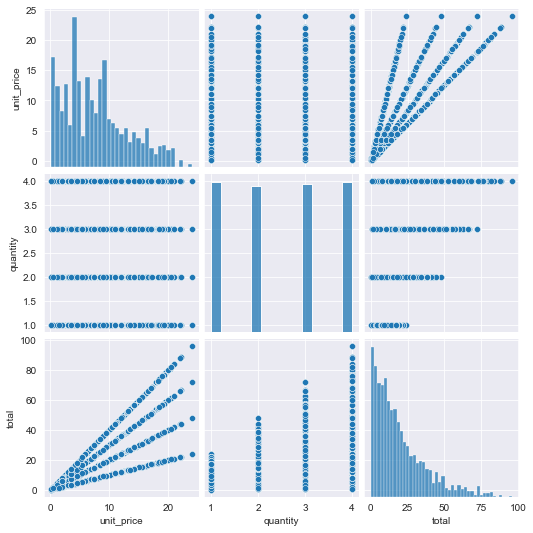

In [14]:
sns.pairplot(data=df)

In [15]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy


In [16]:
df = convert_to_datetime(df, 'timestamp')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [17]:
df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [18]:
df.drop(columns=['product_id','transaction_id'], inplace=True)
df.head()

,timestamp,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card


In [19]:
df['day_of_month'] = df['timestamp'].dt.day

In [20]:
df

,timestamp,category,customer_type,unit_price,quantity,total,payment_type,day_of_month
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet,2
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet,6
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet,4
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet,2
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card,5
...,...,...,...,...,...,...,...,...
7824,2022-03-03 18:22:09,cleaning products,basic,14.19,2,28.38,e-wallet,3
7825,2022-03-04 19:14:46,cleaning products,standard,16.99,1,16.99,credit card,4
7826,2022-03-03 14:00:09,cleaning products,basic,14.19,2,28.38,credit card,3
7827,2022-03-04 15:11:38,cleaning products,basic,16.99,4,67.96,cash,4


In [21]:

df = pd.get_dummies(df, columns=['category'])
df.head()


,timestamp,customer_type,unit_price,quantity,total,payment_type,day_of_month,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-02 09:51:38,gold,3.99,2,7.98,e-wallet,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-03-06 10:33:59,standard,3.99,1,3.99,e-wallet,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-04 17:20:21,premium,0.19,2,0.38,e-wallet,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-02 17:23:58,gold,0.19,4,0.76,e-wallet,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-05 14:32:43,basic,4.49,2,8.98,debit card,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:

df = pd.get_dummies(df, columns=['customer_type'])
df.head()


,timestamp,unit_price,quantity,total,payment_type,day_of_month,category_baby products,category_baked goods,category_baking,category_beverages,...,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard
0,2022-03-02 09:51:38,3.99,2,7.98,e-wallet,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2022-03-06 10:33:59,3.99,1,3.99,e-wallet,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-03-04 17:20:21,0.19,2,0.38,e-wallet,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2022-03-02 17:23:58,0.19,4,0.76,e-wallet,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2022-03-05 14:32:43,4.49,2,8.98,debit card,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:

df = pd.get_dummies(df, columns=['payment_type'])
df.head()


,timestamp,unit_price,quantity,total,day_of_month,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,...,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
0,2022-03-02 09:51:38,3.99,2,7.98,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2022-03-06 10:33:59,3.99,1,3.99,6,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2022-03-04 17:20:21,0.19,2,0.38,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2022-03-02 17:23:58,0.19,4,0.76,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2022-03-05 14:32:43,4.49,2,8.98,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [25]:
df['timestamp_day_of_week'] = df['timestamp'].dt.dayofweek
df['timestamp_hour'] = df['timestamp'].dt.hour
df.drop(columns=['timestamp'], inplace=True)
df.head()

,unit_price,quantity,total,day_of_month,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet,timestamp_day_of_week,timestamp_hour
0,3.99,2,7.98,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,9
1,3.99,1,3.99,6,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,6,10
2,0.19,2,0.38,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,4,17
3,0.19,4,0.76,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,17
4,4.49,2,8.98,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,5,14
